In [64]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [65]:
datatrain = pd.read_csv('trainmobile.csv')
datatest = pd.read_csv('testmobile.csv')

In [66]:
datatrain.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [67]:
datatest.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [68]:
datatest = datatest.drop(['id'], axis=1)

In [69]:
datatest.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [70]:
y_train=datatrain.iloc[:,20]

X_train=datatrain.iloc[:,0:20]

In [71]:
X_test=datatest.iloc[:,0:21]

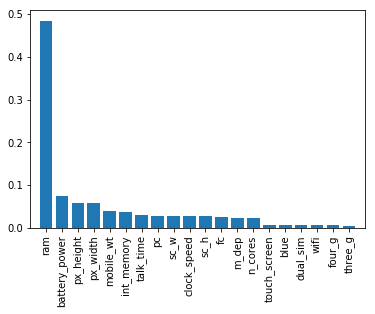

In [72]:
clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
clf.fit(X_train,y_train)

importances = clf.feature_importances_
features = datatrain.columns[:20]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)

plt.show()

In [73]:
top14=sorted_features[:14]
top14

['ram',
 'battery_power',
 'px_height',
 'px_width',
 'mobile_wt',
 'int_memory',
 'talk_time',
 'pc',
 'sc_w',
 'clock_speed',
 'sc_h',
 'fc',
 'm_dep',
 'n_cores']

In [78]:
# take 14 best faetures
y_train=datatrain['price_range'].values
X_train=datatrain[top14].values

X_test=datatest[top14].values

datatrain[top14]

,ram,battery_power,px_height,px_width,mobile_wt,int_memory,talk_time,pc,sc_w,clock_speed,sc_h,fc,m_dep,n_cores
0,2549,842,20,756,188,7,19,2,7,2.2,9,1,0.6,2
1,2631,1021,905,1988,136,53,7,6,3,0.5,17,0,0.7,3
2,2603,563,1263,1716,145,41,9,6,2,0.5,11,2,0.9,5
3,2769,615,1216,1786,131,10,11,9,8,2.5,16,0,0.8,6
4,1411,1821,1208,1212,141,44,15,14,2,1.2,8,13,0.6,2
5,1067,1859,1004,1654,164,22,10,7,1,0.5,17,3,0.7,1
6,3220,1821,381,1018,139,10,18,10,8,1.7,13,4,0.8,8
7,700,1954,512,1149,187,24,5,0,3,0.5,16,0,0.8,4
8,1099,1445,386,836,174,53,20,14,1,0.5,17,0,0.7,7
9,513,509,1137,1224,93,9,12,15,10,0.6,19,2,0.1,5


In [75]:
# MinMaxScaling Preprocessing
from sklearn.preprocessing import MinMaxScaler
std_scale =MinMaxScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

#KNN Classifier
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [76]:
#Training Score
print('Training Score: %.2f%%' % (clf.score(X_train, y_train) * 100))

Training Score: 75.10%


In [82]:
#Model Accuration
y_pred=clf.predict(X_train)
y_pred
print("Akurasi Model" , format(np.mean(y_pred==y_train)))

new = np.array([1067, 1550, 1000, 226, 100, 22, 10, 4, 0, 1.5, 6, 4, 0.2, 8])
new = new.reshape(1,-1)
ynew = clf.predict(new)
ynew

Akurasi Model 0.25


array([3], dtype=int64)

In [1]:
# PKL COVERTER
tempRest=[clf, datatrain]

from sklearn.externals import joblib
joblib.dump(tempRest, 'MobileClassification.pkl')

NameError: name 'clf' is not defined